# Black Scholes Formula

---

## Black Scholes PDE

Under the Black-Scholes (BS) assumptions, there exists an economy that permits no arbitrage. In our economy, our asset (stock) price follows a Geometric Brownian Motion (GBM) with constant drift $\mu$ and volatility $\sigma$ under the physical measure,
$$
dS_t = \mu S_t dt + \sigma S_t dW_t,
$$
and that the risk free-rate is $r$ freely available, i.e. we have a bond with dynamics
$$
dB_t = r B_t dt.
$$
Let's construct a portfolio of one short call, and long $\Delta$ shares, i.e.
$$ 
\Pi(S, t) = -C(S, t) + \Delta S_t.
$$

By Ito's Lemma we have:
$$
d\Pi(S, t) = -\left(\frac{\partial C}{\partial t} dt + \frac{\partial C}{\partial S} dS_t + \frac{1}{2}\sigma^2 S_t^2 \frac{\partial^2 C}{\partial S^2} dt\right) + \Delta dS_t.
$$

By taking $\Delta = \frac{\partial C}{\partial S}$, we eliminate the random terms, leaving only deterministic growth in the portfolio:

$$
d\Pi(S, t) = - \left(\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S_t^2 \frac{\partial^2 C}{\partial S^2}\right) dt.
$$

Because we cannot permit any arbitrage, a riskless portfolio must earn the same as our bond, i.e.
$$ 
d\Pi(S, t) = r \Pi dt = r \left(-C + \frac{\partial C}{\partial S} S_t\right) dt,
$$ 

so we must have
$$ 
\begin{align*}
-rC + r\frac{\partial C}{\partial S} S_t  &= - \frac{\partial C}{\partial t} - \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} \\
\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + rS_t\frac{\partial C}{\partial S} -rC &= 0.
\end{align*}
$$
We have derived the famous BS PDE. The solution to the BS PDE with the terminal boundary condition given by the European option payoff is known as the BS formula.

There are two main classes of approach to solve the BS PDE, namely the PDE approach and the probabilistic approach. Each approach gives us unique insights into how options behave.

In the case of constant parameters, along with standard (non-path-dependent and European-style) payoffs, the BS PDE admits a closed-form solution. In the following, we impose the European call option payoff
$$
C(S,t;K,T) = (S_T-K)^+,
\qquad t=T,
$$
where $(x)^+ \equiv \max(x,0)$, $K$ is the strike price, and $T$ is the maturity.

## Probabilistic Approach

We first solve the PDE via the probabilistic approach. Since the BS PDE is linear and parabolic, we can transform the PDE to a probabilistic representation via the Feynman-Kac theorem
$$
C(S_t,t) =
\mathbb E_t^{\mathbb Q}\!\left[
D_r(t,T)\,C(S_T,T)
\right],
$$
where the discount factor is
$$
D_r(t,T)=\frac{M(t)}{M(T)}=e^{-r(T-t)},
$$
and $\mathbb Q$ is the risk-neutral (money market) measure associated with the numeraire
$$
M(t)=e^{rt}.
$$

By Girsanov's theorem, the risk-neutral dynamics of the underlying asset are
$$
dS_t = r S_t\,dt + \sigma S_t\, dW_t^{\mathbb Q}.
$$
Solving this SDE yields
$$
S_T =
S_t \exp\!\left(
\left(r-\tfrac12\sigma^2\right)(T-t)
+ \sigma\sqrt{T-t}\,Z
\right),
\qquad Z\sim \mathcal N(0,1),
$$
hence, implying $S_T$ is lognormal
$$
\ln S_T \sim
\mathcal N\!\left(
\ln S_t + \left(r-\tfrac12\sigma^2\right)(T-t),
\;\sigma^2(T-t)
\right).
$$

Equivalently, the risk-neutral density of $S_T$ conditional on $S_t$ is
$$
\phi_{S_T}(s) =
\frac{1}{s\,\sigma\sqrt{2\pi (T-t)}}
\exp\!\left(
-\frac{\left(\ln s - \ln S_t - \left(r-\tfrac12\sigma^2\right)(T-t)\right)^2}
{2\sigma^2 (T-t)}
\right),
\qquad s>0.
$$

Applying the payoff and expressing the expectation as an integral gives
$$
\begin{aligned}
C(S_t,t)
&=
e^{-r(T-t)}
\int_0^\infty (s-K)^+\,\phi_{S_T}(s)\,ds \\
&=
e^{-r(T-t)}
\int_K^\infty (s-K)\,\phi_{S_T}(s)\,ds.
\end{aligned}
$$

Splitting the integral, we get
$$
C(S_t,t) =
e^{-r(T-t)}
\left(
\int_K^\infty s\,\phi_{S_T}(s)\,ds -
K\int_K^\infty \phi_{S_T}(s)\,ds
\right).
$$

Using the properties of the lognormal distribution, these integrals evaluate to
$$
\int_K^\infty \phi_{S_T}(s)\,ds = 
\Phi(d_2), 
\qquad
\int_K^\infty s\,\phi_{S_T}(s)\,ds = S_t e^{r(T-t)} \Phi(d_1),
$$
where
$$
d_1 =
\frac{\ln(S_t/K)+(r+\tfrac12\sigma^2)(T-t)}{\sigma\sqrt{T-t}},
\qquad
d_2 =
d_1-\sigma\sqrt{T-t}.
$$

Substituting back, we obtain the BS formula for a European call option:
$$
\boxed{
C(S_t,t) =
S_t \Phi(d_1) -
K e^{-r(T-t)} \Phi(d_2)
}.
$$

### Interpretations (tbd):

FTAP and Expectations:
- BS PDE can be transformed into a probabilistic representation, which states that the derivative price is simply the risk neutral expectation of the discounted payoff. This is known as the Fundamental Theorem of Asset Pricing (FTAP).
- Feynman Kac shows us that there is a fundamental connection between PDE and stochastic processes. The probabilistic representation (the FTAP) gives us a simple recipe to compute derivative price via the Monte Carlo method.

Option price and probability:
- The first term in the BS formula: $\int_K^\infty s\,\phi_{S_T}(s)\,ds$ represents the expected value of $S_T$ conditional on being ITM, i.e. "how much money can I expect to get from the stock if the option finishes in the money?"
- The second term: $K \int_K^\infty \phi_{S_T}(s)\,ds$ represents the probability of the option expiring ITM under the risk-neutral measure, multiplied by the strike, i.e. "how much will I have to pay (strike price) if the option is exercised?"

Implied ITM probability
- As we saw, $\Phi(d_2)=\mathbb{Q}(S_T>K)$ is the risk neutral probability of the option expiring ITM. Using the relationship between $d_2$ and $\sigma$ (quoted from the market), we can compute $\Phi(d_2)$ directly to estimate the market implied $\mathbb{Q}(S_T>K)$.
- For short dated options, it is common to quote the option delta ($\Delta$) directly as the implied $\mathbb{Q}(S_T>K)$. This is because $\Delta = \Phi(d_1)$, and time to maturity is small, $d_1 = d_2 + \sigma \sqrt{T-t} \approx d_2$, thus $\Delta \approx \Phi(d_2)$.

## PDE Approach (via heat equation)

Again, we start from the BS PDE for a European call option $C(S,t)$:

$$
\frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + r S \frac{\partial C}{\partial S} - r C = 0,
$$
with terminal condition at $t=T$ (payoff):
$$
C(S,T) = \max(S-K,0).
$$

By the change of variable $x = \ln(S/K)$, we have $S = K e^x$ and

$$
\frac{\partial C}{\partial S} = \frac{1}{S} \frac{\partial C}{\partial x}, \quad
\frac{\partial^2 C}{\partial S^2} = \frac{1}{S^2} \left( \frac{\partial^2 C}{\partial x^2} - \frac{\partial C}{\partial x} \right),
$$

which transforms the PDE to

$$
\frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 C}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial C}{\partial x} - r C = 0.
$$

Defining a discounted function $C(S,t) = e^{-r(T-t)} V(x,t)$ removes the $-r C$ term, yielding

$$
\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 \frac{\partial^2 V}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial V}{\partial x} = 0.
$$

Using the time-to-maturity $\tau = T-t$ so that $\partial/\partial t = -\partial/\partial \tau$, the PDE becomes

$$
\frac{\partial V}{\partial \tau} = \frac{1}{2}\sigma^2 \frac{\partial^2 V}{\partial x^2} + \left(r - \frac{1}{2}\sigma^2\right) \frac{\partial V}{\partial x}.
$$

Introducing $V(x,\tau) = e^{\alpha x + \beta \tau} u(x,\tau)$ with

$$
\alpha = -\frac{r - \frac{1}{2}\sigma^2}{\sigma^2}, \quad
\beta = -\frac{1}{2}\sigma^2 \alpha^2 - \left(r - \frac{1}{2}\sigma^2\right)\alpha,
$$

removes the first derivative term and reduces the PDE to the heat equation

$$
\frac{\partial u}{\partial \tau} = \frac{1}{2}\sigma^2 \frac{\partial^2 u}{\partial x^2},
$$

with initial condition

$$
u(x,0) = e^{-\alpha x} \max(K e^x - K, 0).
$$

The solution of the heat equation is

$$
u(x,\tau) = \frac{1}{\sqrt{2 \pi \sigma^2 \tau}} \int_{-\infty}^{\infty} u(y,0) \exp\left( - \frac{(x-y)^2}{2 \sigma^2 \tau} \right) dy,
$$

and transforming back gives

$$
C(S,t) = e^{-r(T-t)} V(x,\tau) = e^{-r(T-t)} e^{\alpha x + \beta \tau} u(x,\tau),
$$

which simplifies to the BS formula

$$
\boxed{
C(S,t) = S \Phi(d_1) - K e^{-r(T-t)} \Phi(d_2),
}
$$

with

$$
d_1 = \frac{\ln(S/K) + \left(r + \frac{1}{2}\sigma^2\right)(T-t)}{\sigma \sqrt{T-t}}, \quad
d_2 = d_1 - \sigma \sqrt{T-t}.
$$

Thus, we reproduced the BS formula using the PDE approach.

### Interpretations (tbd):

### Numerical Example:

Finally, let's demonstrate that we can generate numerical results (by Monte Carlo method) that match with our analytical solution.

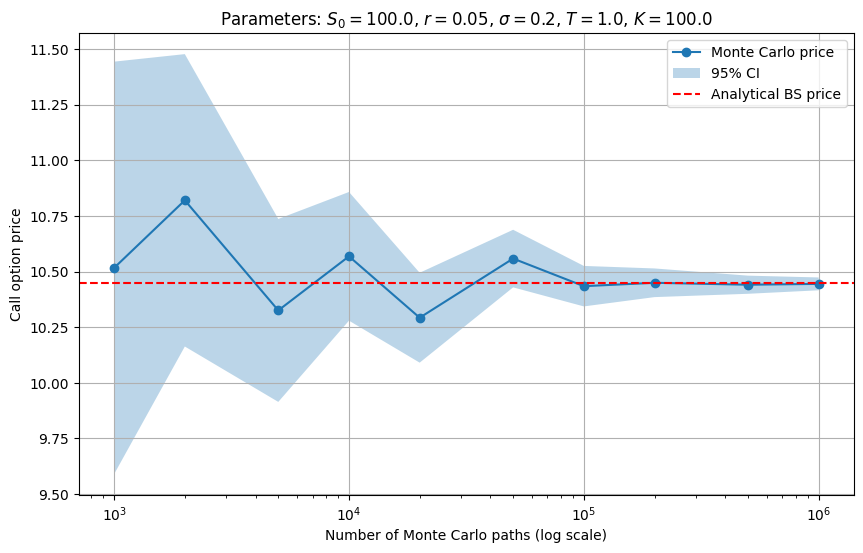

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm

# =============================
# Parameters
# =============================
S0 = 100.0      # initial stock price
K = 100.0       # strike price
r = 0.05        # risk-free rate
sigma = 0.2     # volatility
T = 1.0         # maturity (years)

# Array of number of Monte Carlo paths
path_counts = np.array([1_000, 2_000, 5_000, 10_000, 20_000,
                        50_000, 100_000, 200_000, 500_000, 1_000_000])

seed = 42
np.random.seed(seed)

# =============================
# Analytical Black–Scholes price
# =============================
d1 = (log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
d2 = d1 - sigma * sqrt(T)

bs_price = S0 * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

# =============================
# Monte Carlo pricing
# =============================
mc_prices = []
ci_lower = []
ci_upper = []

for N in path_counts:
    Z = np.random.randn(N)
    ST = S0 * np.exp(
        (r - 0.5 * sigma**2) * T
        + sigma * sqrt(T) * Z
    )
    payoff = np.maximum(ST - K, 0.0)
    discounted_payoff = exp(-r * T) * payoff

    mean_price = discounted_payoff.mean()
    std_error = discounted_payoff.std(ddof=1) / np.sqrt(N)

    mc_prices.append(mean_price)
    ci_lower.append(mean_price - 1.96 * std_error)
    ci_upper.append(mean_price + 1.96 * std_error)

mc_prices = np.array(mc_prices)
ci_lower = np.array(ci_lower)
ci_upper = np.array(ci_upper)

# =============================
# Plot convergence
# =============================
plt.figure(figsize=(10,6))
plt.plot(path_counts, mc_prices, marker='o', label="Monte Carlo price")
plt.fill_between(path_counts, ci_lower, ci_upper, alpha=0.3, label="95% CI")
plt.axhline(bs_price, linestyle='--', color='red', label="Analytical BS price")

plt.xscale("log")
plt.xlabel("Number of Monte Carlo paths (log scale)")
plt.ylabel("Call option price")
plt.title(rf"Parameters: $S_0=${S0}, $r=${r}, $\sigma=${sigma}, $T=${T}, $K=${K}")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import pandas as pd

# Example values
data = {
    "S_t": [S0],
    "r": [r],
    "sigma": [sigma],
    "T": [T],
    "K": [K],
    "option price": [bs_price]  # analytical
}

# Create DataFrame
df = pd.DataFrame(data)

# Display
display(df)

,S_t,r,sigma,T,K,option price
0,100.0,0.05,0.2,1.0,100.0,10.450584
